In [2]:
!pip install transformers
!pip install keybert
!pip install nltk
!!pip install sumy

['Requirement already satisfied: sumy in /usr/local/lib/python3.10/dist-packages (0.11.0)',
 'Requirement already satisfied: docopt<0.7,>=0.6.1 in /usr/local/lib/python3.10/dist-packages (from sumy) (0.6.2)',
 'Requirement already satisfied: breadability>=0.1.20 in /usr/local/lib/python3.10/dist-packages (from sumy) (0.1.20)',
 'Requirement already satisfied: requests>=2.7.0 in /usr/local/lib/python3.10/dist-packages (from sumy) (2.31.0)',
 'Requirement already satisfied: pycountry>=18.2.23 in /usr/local/lib/python3.10/dist-packages (from sumy) (22.3.5)',
 'Requirement already satisfied: nltk>=3.0.2 in /usr/local/lib/python3.10/dist-packages (from sumy) (3.8.1)',
 'Requirement already satisfied: chardet in /usr/local/lib/python3.10/dist-packages (from breadability>=0.1.20->sumy) (5.2.0)',
 'Requirement already satisfied: lxml>=2.0 in /usr/local/lib/python3.10/dist-packages (from breadability>=0.1.20->sumy) (4.9.3)',
 'Requirement already satisfied: click in /usr/local/lib/python3.10/di

In [3]:
%%time
from transformers import BertTokenizer, BertForSequenceClassification
from keybert import KeyBERT
from nltk.stem import PorterStemmer

import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')  # Use AutoTokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-cased')
stemmer = PorterStemmer()  # Create a stemmer object

def extract_keywords(input_text, model_name='bert-base-cased', top_n=10):

    # Split the input text into chunks of maximum length 512
    chunked_text = [input_text[i:i+256] for i in range(0, len(input_text), 256)]

    keywords = set()  # Use a set to store unique keywords
    for chunk in chunked_text:
        tokenized_input = tokenizer.encode(chunk, add_special_tokens=False)
        model_output = model(torch.tensor([tokenized_input]))[0]
        keybert = KeyBERT(model=model)
        chunk_keywords = keybert.extract_keywords(chunk, top_n=top_n)

        # Apply stemming to each keyword
        stemmed_keywords = [stemmer.stem(keyword[0]) for keyword in chunk_keywords]

        # Add unique stemmed keywords to the set
        keywords.update(stemmed_keywords)

        if len(keywords) >= top_n:
            break

    # Convert the set of keywords back to a list
    keywords = list(keywords)[:top_n]

    return keywords


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 13 s, sys: 1.65 s, total: 14.6 s
Wall time: 36.2 s


In [4]:
import pandas as pd
data_label_1 = pd.read_csv('labeled_2023_04_28.csv')
data_label_2 = pd.read_csv('labeled_2023_05_08_version_final.csv')
df = pd.concat([data_label_1, data_label_2], ignore_index=True)
df.head()

,Unnamed: 0,id,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,...,createdAt,country,location,translated,translated_body,translated_title,clean_text,is_relevant,importance_score,label
0,0,7095357446,eng,False,2022-06-28,20:25:00,2022-06-28T20:25:00Z,2022-06-28T20:25:00Z,news,0.866667,...,2022-06-28T20:47:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
1,1,7100315028,eng,False,2022-07-02,16:49:00,2022-07-02T16:49:00Z,2022-07-02T16:48:00Z,news,0.937255,...,2022-07-02T17:07:00Z,NaN,NaN,False,NaN,NaN,the cost of everything from gas to burgers may...,False,NaN,NaN
2,2,7095328304,eng,False,2022-06-28,19:51:00,2022-06-28T19:51:00Z,2022-06-28T19:50:00Z,news,0.901961,...,2022-06-28T20:47:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
3,3,7095562326,eng,False,2022-06-29,01:33:00,2022-06-29T01:33:00Z,2022-06-29T01:32:00Z,news,0.894118,...,2022-06-29T03:07:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
4,4,b-7131974343,eng,False,2022-07-29,02:42:00,2022-07-29T02:42:00Z,2022-07-29T02:42:00Z,blog,NaN,...,2022-07-29T03:07:00Z,NaN,NaN,False,NaN,NaN,the th edition of india foodex will be held f...,False,NaN,NaN


In [5]:
from nltk.stem import PorterStemmer

def stem_words(word_list):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in word_list]
    return stemmed_words

In [6]:
def Score(input_text):
    score = 0
    keywords = extract_keywords(input_text, model_name='bert-base-cased', top_n=5)

    agri_keywords_en = ['poland', 'perception', 'soil', 'pollen', 'traders', 'tender', 'tassel corn', 'supply', 'demand', 'planting', 'flowering', 'tomatoes', 'lutte', 'green', 'expansion', 'companies', 'corn', 'corps', 'planting', 'agriculture', 'farming', 'harvest', 'ags', 'cotton', 'COVID-19', 'soil health', 'irrigation systems', 'pest management', 'monsoon', 'agrochemical', 'rice', 'crop', 'drought', 'rainfall', 'food', 'pandemic', 'climatologist', 'farm', 'farmer', 'broccoli', 'cucumbers', 'squash', 'lettuce', 'beans', 'peppers', 'basil', 'eggplant', 'csa program', 'farms', 'plant nutrient', 'wheat', 'agricultural', 'moringa products', 'packaging', 'distribution', 'health benefits', 'growth', 'vendors', 'growth prospects', 'fast-growing segments', 'slow-growing segments', 'moringa seeds', 'oil', 'healthcare', 'personal care product industries', 'therapeutic potential', 'disposable incomes', 'exports', 'Offerings', 'market definition', 'market size', 'forecast', 'year-over-year growth', 'COVID-19 pandemic', 'price sensitivity', 'adoption lifecycle', 'price', 'Key purchase criteria', 'Growing demand', 'vegan demographics', 'vendor overview', 'product segments', 'farm technology', 'tractor', 'farm management', 'Production', 'soybeans', 'sugar', 'USDA', 'Biopesticides', 'organic agriculture', 'Marrone Bio Innovations', 'bioinsecticides', 'biofungicides', 'Bionematicides', 'Bioherbicides', 'fruits', 'vegetables', 'specialty crops', 'botanical', 'bacillus', 'trichoderma', 'streptomyces', 'institutional investors', 'COVID', 'ukrain', 'russia', 'war', 'cereals', 'season', 'seeds', 'yields', 'renewables', 'nutrient', 'grow', 'biopesticides', 'market', 'investment', 'stocknews', 'stock', 'trading', 'rating', 'chief', 'service', 'economic', 'statement', 'painfully', 'first', 'fresh', 'indonesia', 'say', 'bring', 'company', 'outbreak', 'record', 'private', 'sioux', 'russian', 'economist', 'health', 'look', 'tree', 'line', 'register', 'be', 'turkey', 'study', 'gold', 'analysis', 'practice', 'finance', 'would', 'apiary', 'canada', 'project', 'hormel', 'phosphorus', 'european', 'trend', 'intermediary', 'pose', 'remain', 'dividend', 'recycle', 'ukraine', 'compostable', 'ghana', 'pembina', 'disease', 'nutrien', 'change', 'million', 'compare', 'high', 'take', 'temperature', 'escalator', 'major', 'fruit', 'lakh', 'military', 'barchart', 'commodity', 'country', 'rural', 'reference', 'local', 'continue', 'daily', 'mexico', 'solution', 'segment', 'mike', 'go', 'fertilizer', 'year', 'quarter', 'talk', 'forward', 'share', 'deal', 'acreage', 'income', 'iaea', 'people', 'climate', 'marketsandmarkets', 'cola', 'moringa', 'energy', 'univar', 'clash', 'europe', 'rat', 'cent', 'weapon', 'ukrainian', 'data', 'week', 'sow', 'exhibit', 'product', 'pest', 'ship', 'grain', 'production', 'government', 'arm', 'progress', 'insect', 'organic', 'bloomberg', 'china','innospec','chemical','nebraska','intelligence','organization','u.s.','sudan','california','india','brazil', 'argentine', 'USA', 'italy', 'germany', 'spain']
    agri_keywords_en_stemmed = stem_words(agri_keywords_en)
    for keyword in keywords:
        if keyword.lower() in agri_keywords_en_stemmed:
                score += 0.7
        else:
                score -= 0.3


    return score



In [8]:
%%time
df['score'] = df['clean_text'].apply(lambda x: Score(x))

CPU times: user 5min 29s, sys: 1min 4s, total: 6min 34s
Wall time: 7min 46s


In [19]:
import numpy as np

df["Label"] = np.where(df["score"] >= -0.4, True, False)

In [14]:
import pip
pip.main(['install','seaborn'])

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (0.12.2)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /usr/local/lib/python3.10/dist-packages (from seaborn) (1.23.5)

Requirement already satisfied: pandas>=0.25 in /usr/local/lib/python3.10/dist-packages (from seaborn) (1.5.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /usr/local/lib/python3.10/dist-packages (from seaborn) (3.7.1)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.1.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.42.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.1.1)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=0.25->seaborn) (2023.3)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

0

In [17]:
df[["score","is_relevant","Label"]]

,score,is_relevant,Label
0,1.5,False,True
1,1.5,False,True
2,1.5,False,True
3,1.5,False,True
4,0.5,False,True
...,...,...,...
95,-1.5,False,False
96,-0.5,True,True
97,-0.5,True,True
98,1.5,False,True


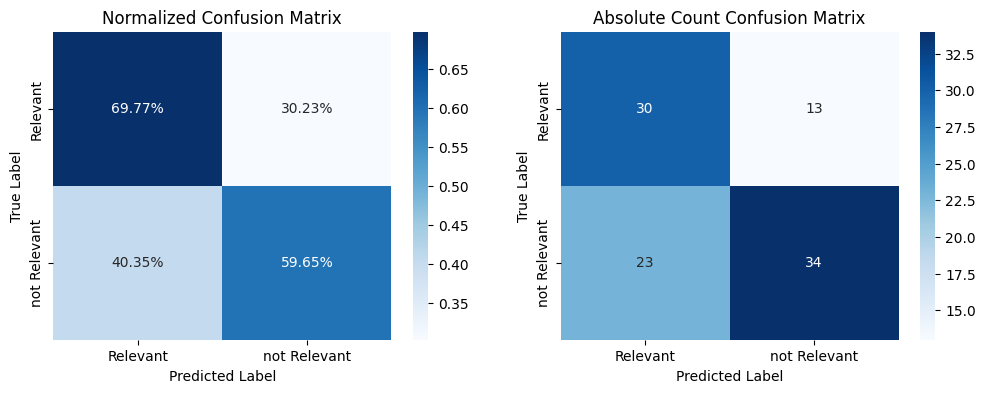

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert boolean values in y_true to string values that match those in y_pred
y_true = df['is_relevant'].map({True: 'Relevant', False: 'not Relevant'})

# Convert boolean values in y_pred to string values that match those in y_true
y_pred = df['Label'].map({True: 'Relevant', False: 'not Relevant'})

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred, labels=['Relevant', 'not Relevant'])

# Normalize confusion matrix
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Create subplots for two confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Generate heatmap plot with annotations for normalized confusion matrix
sns.heatmap(conf_mat_norm, annot=True, fmt='.2%', cmap='Blues', ax=axes[0])

# Add axis labels and title for normalized confusion matrix
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Normalized Confusion Matrix')

# Add class names to axis ticks
axes[0].xaxis.set_ticklabels(['Relevant', 'not Relevant'])
axes[0].yaxis.set_ticklabels(['Relevant', 'not Relevant'])

# Generate heatmap plot with annotations for absolute count confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', ax=axes[1])

# Add axis labels and title for absolute count confusion matrix
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Absolute Count Confusion Matrix')

# Add class names to axis ticks
axes[1].xaxis.set_ticklabels(['Relevant', 'not Relevant'])
axes[1].yaxis.set_ticklabels(['Relevant', 'not Relevant'])

# Show plot
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
# Calculate F1-score
f1 = f1_score(y_true, y_pred, pos_label='Relevant')
# Show accuracy and F1-score
print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.64
F1-score: 0.625
